In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
df_train = pd.read_csv('train_Df64byy.csv')

In [16]:

y = df_train['Response']
df_train.drop(['ID','Lower_Age','Is_Spouse','Reco_Insurance_Type','Accomodation_Type','Response'],axis = 1,inplace = True)


In [17]:
#City_Code : remove c from the column
lst2 = df_train['City_Code']
city = [int(x[1:]) for x in lst2]
#print(city)
df_train['City_Code'] = city

# Health Indicator:fillna
# df_train['Health Indicator'].fillna("X0", inplace = True)
lst1 = df_train['Health Indicator']
health = [int(x[1:]) if isinstance(x, str) else np.nan for x in lst1 ]
df_train['Health Indicator'] = health

#Holding_Policy_Duration:label check
df_train['Holding_Policy_Duration'] = df_train['Holding_Policy_Duration'].replace(['14+'],'15')
# df_train['Holding_Policy_Duration'].fillna(df_train['Holding_Policy_Duration'].median(),inplace = True)
lst = df_train['Holding_Policy_Duration']
df_train['Holding_Policy_Duration'] = [float(x) for x in lst]

#Holding_Policy_Type:label check
df_train['Holding_Policy_Type'].unique()
# df_train['Holding_Policy_Type'].fillna(0.,inplace = True)

array([ 3., nan,  1.,  4.,  2.])

In [18]:
df_train.head()

,City_Code,Region_Code,Upper_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,3,3213,36,1.0,15.0,3.0,22,11628.0
1,5,1117,75,2.0,NaN,NaN,22,30510.0
2,5,3732,32,NaN,1.0,1.0,19,7450.0
3,24,4378,52,1.0,15.0,3.0,19,17780.0
4,8,2190,44,2.0,3.0,1.0,16,10404.0


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.to_numpy(), y.to_numpy(), test_size = 0.2, random_state = 0)

In [20]:
X_train.shape

(40705, 8)

In [21]:
X_test

array([[1.8000e+01, 9.8000e+02, 4.2000e+01, ..., 1.0000e+00, 2.0000e+00,
        1.3530e+04],
       [1.9000e+01, 1.8060e+03, 6.8000e+01, ..., 3.0000e+00, 1.0000e+00,
        1.5008e+04],
       [2.0000e+00, 2.1620e+03, 4.3000e+01, ...,        nan, 3.0000e+00,
        1.3524e+04],
       ...,
       [1.7000e+01, 1.6000e+02, 5.7000e+01, ..., 2.0000e+00, 1.9000e+01,
        1.9680e+04],
       [1.5000e+01, 2.9140e+03, 6.9000e+01, ..., 3.0000e+00, 1.6000e+01,
        2.1148e+04],
       [8.0000e+00, 5.5800e+02, 2.3000e+01, ..., 4.0000e+00, 2.2000e+01,
        1.0704e+04]])

In [22]:
#cols = df_train.columns
#use after splitting the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#df_train1 = pd.DataFrame(X_train1,columns=cols,index=None)

In [23]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(use_label_encoder=False)
 
# fit the model with the training data
model_xgb.fit(X_train,y_train)

[23:15:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [24]:
y_predict = model_xgb.predict(scaler.transform(X_test))

In [25]:
df_val = pd.read_csv('test_YCcRUnU.csv')
df_val.drop(['ID','Lower_Age','Is_Spouse','Reco_Insurance_Type','Accomodation_Type'],axis = 1,inplace = True)
lst2 = df_val['City_Code']
city = [int(x[1:]) for x in lst2]
#print(city)
df_val['City_Code'] = city

df_val['Health Indicator'].fillna("X0", inplace = True)
lst1 = df_val['Health Indicator']
health = [int(x[1:]) for x in lst1]
df_val['Health Indicator'] = health

df_val['Holding_Policy_Duration'] = df_val['Holding_Policy_Duration'].replace(['14+'],'15')
df_val['Holding_Policy_Duration'].fillna(df_val['Holding_Policy_Duration'].median(),inplace = True)
lst = df_val['Holding_Policy_Duration']
df_val['Holding_Policy_Duration'] = [float(x) for x in lst]

df_val['Holding_Policy_Type'].fillna(0.,inplace = True)

In [26]:
df_val.shape

(21805, 8)

In [27]:
scaler.transform(df_val).shape

(21805, 8)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_test = accuracy_score(y_test,y_predict)
accuracy_test
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_predict

In [29]:
accuracy_test = accuracy_score(y_test,y_predict)
accuracy_test

0.7504176083325145

In [30]:
predictions = model_xgb.predict_proba(scaler.transform(df_val))[:,1]
#print ('ROC AUC Score',roc_auc_score(y_test,predictions))

In [31]:
predictions.shape

(21805,)

In [32]:
pd.DataFrame()

""


In [33]:
df = pd.read_csv('sample_submission_QrCyCoT.csv')

In [34]:
df['index'] = df.index

In [35]:
df

,ID,Response,index
0,50883,0,0
1,50884,0,1
2,50885,0,2
3,50886,0,3
4,50887,0,4
...,...,...,...
21800,72683,0,21800
21801,72684,0,21801
21802,72685,0,21802
21803,72686,0,21803


In [36]:
df11 = pd.DataFrame(predictions,columns=["Response_True"])


In [37]:
df11['index'] = df11.index

In [38]:
df11

,Response_True,index
0,0.275718,0
1,0.241006,1
2,0.415625,2
3,0.200358,3
4,0.062591,4
...,...,...
21800,0.179927,21800
21801,0.233590,21801
21802,0.001176,21802
21803,0.108771,21803


In [39]:
display("The merged DataFrame") 
df_two = pd.merge(df, df11, on = "index", how = "inner")

'The merged DataFrame'

In [40]:
df_two.drop(['Response','index'],axis = 1,inplace= True)

In [41]:
#df_two
df_two.rename(columns={'Response_True': 'Response'}, inplace=True)

In [42]:
df_two.to_csv('result_3.csv',index=None,header=True)

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import precision_score, recall_score, roc_auc_score,f1_score

In [20]:
def output_model_stats(models, X_train, y_train):
    
    """
    paramters: models (dict), X_train (dataframe, array), y_train (dataframe, array)
        
    Function outputs these metrics:
        > 'accuracy',
        > 'accuracy_cv_score',
        > 'accuracy_cv_stddev',
        > 'precision_score',
        > 'recall_score',
        > 'f1_score',
        > 'roc_auc_score (cross_val_score)'
    """
    model_stats = {}
    for mname, minst in models.items():
        model_scores = []

        # create pipeline with scaler and model instantiation steps
        model_pipe = make_pipeline(StandardScaler(), minst)

        # fit training data and run model score
        model_pipe.fit(X_train, y_train)
        model_scores.append(model_pipe.score(X_train, y_train))

        # implement cross validation model accuracy score
        scores = cross_val_score(model_pipe, X_train, y_train, cv=10, scoring='accuracy')
        model_scores.append(scores.mean())
        model_scores.append(scores.std())

        # implement cross validation predictions on training data
        y_train_cv_pred = cross_val_predict(model_pipe, X_train, y_train, cv=10)

        # calculate precision and recall
        p = precision_score(y_train, y_train_cv_pred)
        r = recall_score(y_train, y_train_cv_pred)
        model_scores.append(p)
        model_scores.append(r)

        # calculate F1 score
        f1_scor = f1_score(y_train, y_train_cv_pred, average=None)
        #f1_score = 2*(p*r)/(p+r)
        model_scores.append(f1_scor)

        # calculate ROC AUC score using cross_val_score
        roc_auc_cvs = cross_val_score(model_pipe, X_train, y_train, cv=10, scoring='roc_auc').mean()
        model_scores.append(roc_auc_cvs)

        # create dictionary key/pair value
        model_stats[mname] = model_scores
    
    colnames = ['accuracy','accuracy_cv_score','accuracy_cv_stddev',
                'precision_score','recall_score','f1_scor',
                'roc_auc_score (cross_val_score)']

    # put model stats into a dataframe
    df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index', columns=colnames)
    df_model_stats_ranked = df_model_stats.sort_values(by='accuracy', ascending=False)

    # output is a dataframe
    
    return(df_model_stats_ranked)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [40]:
from sklearn.inspection import permutation_importance

In [22]:
# random_state=0 for reproducibility; create dictionary for function parameter
models = {'LogisticRegression': LogisticRegression(random_state=0),
          'SupportVectorMachines': SVC(random_state=0),
          'RandomForest': RandomForestClassifier(random_state=0),
          'KNN': KNeighborsClassifier(n_neighbors=5),
          'GaussianNaiveBayes': GaussianNB(),
          'Perceptron': Perceptron(random_state=0),
          'LinearSVC': LinearSVC(dual=False, random_state=0),
          'StochasticGradientDescent': SGDClassifier(random_state=0),
          'DecisionTree': DecisionTreeClassifier(random_state=0)}

# use helper function (output_model_stats) to generate all performance and model diagnostic metrics
df_all_models = output_model_stats(models, X_train, y_train)

# output dataframe
df_all_models

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

,accuracy,accuracy_cv_score,accuracy_cv_stddev,precision_score,recall_score,f1_scor,roc_auc_score (cross_val_score)
RandomForest,1.000000,0.758605,0.001994,0.419240,0.036429,"[0.8613674200739299, 0.0670338017470566]",0.632658
DecisionTree,1.000000,0.669303,0.005910,0.314255,0.329205,"[0.7813672465039224, 0.32155637316667507]",0.552383
KNN,0.792654,0.715391,0.004396,0.268281,0.113209,"[0.828702813798406, 0.15922781043617099]",0.535274
LogisticRegression,0.761946,0.761946,0.000029,0.000000,0.000000,"[0.8648912437255996, 0.0]",0.563137
SupportVectorMachines,0.761946,0.761946,0.000029,0.000000,0.000000,"[0.8648912437255996, 0.0]",0.538988
GaussianNaiveBayes,0.761946,0.761946,0.000029,0.000000,0.000000,"[0.8648912437255996, 0.0]",0.554329
LinearSVC,0.761946,0.761946,0.000029,0.000000,0.000000,"[0.8648912437255996, 0.0]",0.563052
StochasticGradientDescent,0.761946,0.761946,0.000029,0.000000,0.000000,"[0.8648912437255996, 0.0]",0.534916
Perceptron,0.527380,0.647436,0.058203,0.248733,0.238080,"[0.7701817599487548, 0.24329027155286054]",0.517581


In [36]:
def rf_feature_ranking(n, feature_importance_scores):
    """
    n (parameter 1): an integer; number of features in X_train
    feature_importance_scores (parameter 2): numpy ndarray from sklearn.ensemble.RandomForestClassifier.feature_importances_
    """
    
    feature_importances = {}
    for idx in range(n):
        key = df_train1.columns[idx]
        val = feature_importance_scores[idx]
        feature_importances[key] = val

    df_feature_importances = pd.DataFrame.from_dict(feature_importances, orient='index', columns=['importance'])
    df_sorted = df_feature_importances.sort_values('importance', ascending=False)
    
    return df_sorted

In [44]:
df_train1 = pd.DataFrame(X_train,columns=df_train.columns,index=None)
df_y = pd.DataFrame(y_train,columns=['Response'],index = None)

In [45]:
rf_base = RandomForestClassifier(n_estimators=100, random_state=0)
rf_base.fit(df_train1, df_y)
n = len(X_train_rf.columns)
importance_scores = rf_base.feature_importances_
rf_feature_ranking(n, importance_scores)

<ipython-input-45-9909f311485a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_base.fit(df_train1, df_y)


,importance
Region_Code,0.221243
Reco_Policy_Premium,0.220814
Upper_Age,0.152845
Reco_Policy_Cat,0.113941
City_Code,0.108496
Health Indicator,0.078061
Holding_Policy_Duration,0.062727
Holding_Policy_Type,0.041873


In [ ]:
# remove health policy type

<ipython-input-46-d5b805b7e5c3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(df_train1, df_y)
<ipython-input-46-d5b805b7e5c3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(df_train1.columns[tree_importance_sorted_idx])


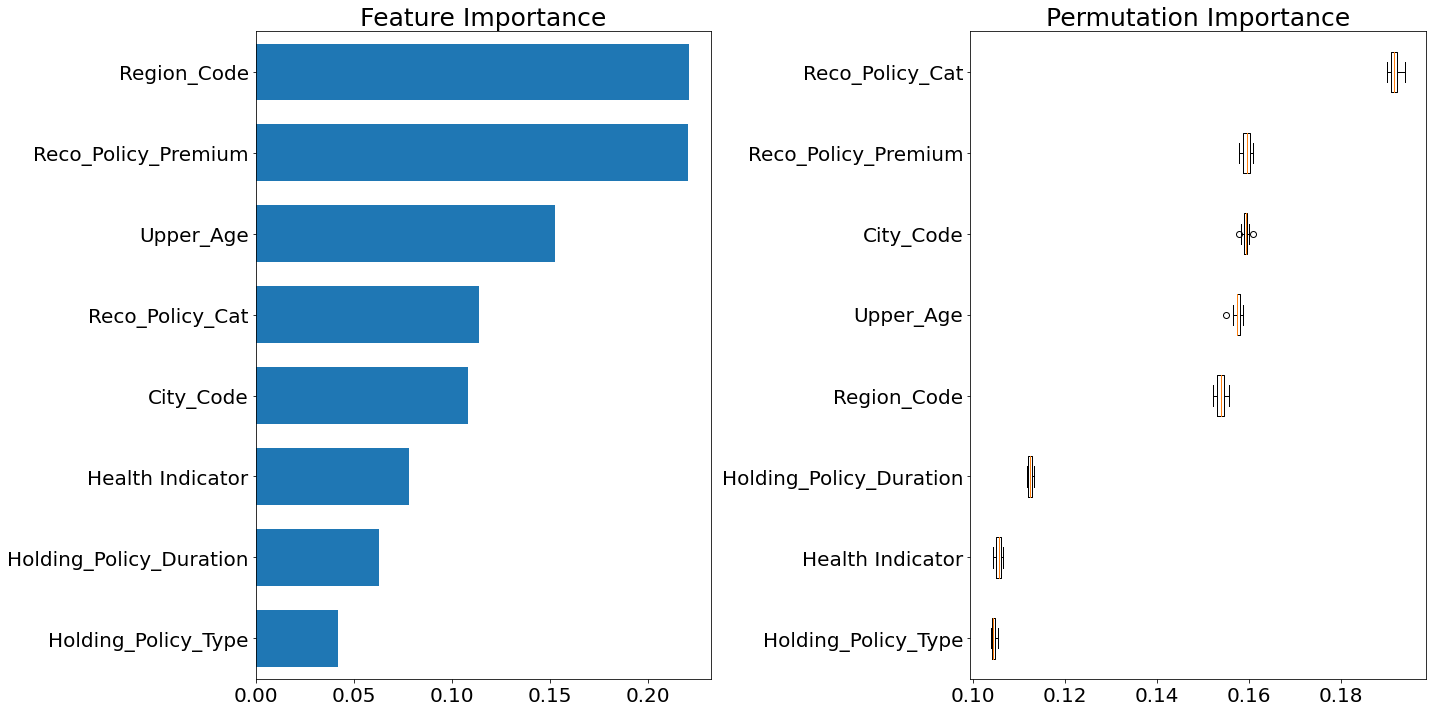

In [46]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(df_train1, df_y)

result = permutation_importance(clf, df_train1, df_y, n_repeats=10, random_state=0)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(df_train1.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax1.tick_params(labelsize=20)
ax1.set_title('Feature Importance', fontsize=25)

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df_train1.columns[perm_sorted_idx])
ax2.set_title('Permutation Importance', fontsize=25)
ax2.tick_params(labelsize=20)

fig.tight_layout()
plt.show()

In [49]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

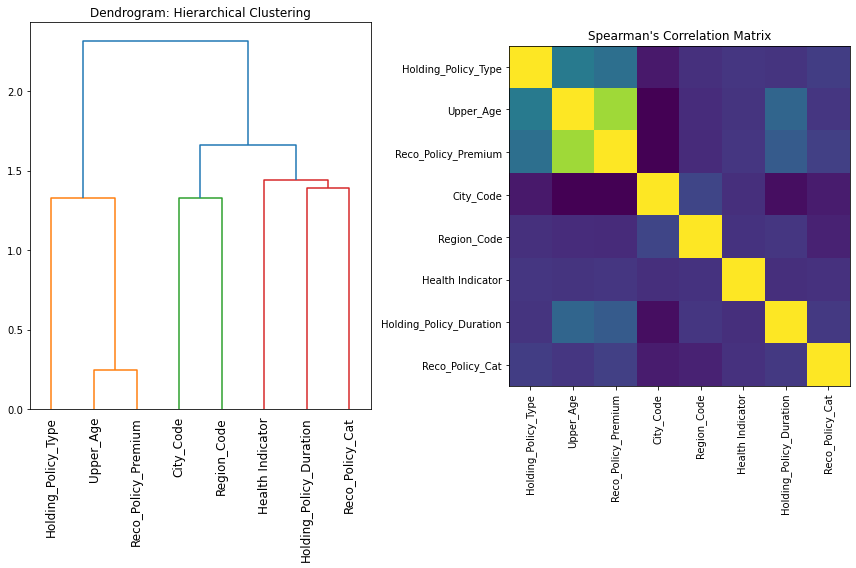

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(df_train1).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=df_train1.columns, ax=ax1, leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))
ax1.set_title('Dendrogram: Hierarchical Clustering')

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
ax2.set_title("Spearman's Correlation Matrix")
fig.tight_layout()
plt.show()